### Web scraping of job posts from sg.indeed.com with Data analysis


In this notebook I will be analyzing job posts which i have scraped from sg.indeed.com
I have linked my code together within the project file. Feel free to take a look at it.

To start off, I will be importing the modules which will be used for the analysis as well as the csv file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
df = pd.read_csv("level2Scrape.csv")

In [2]:
df.head(5)

,Unnamed: 0,JobTitle,Company,Extracted,Salary,Summary,JobUrl,Qualifications
0,0,Graduate Business Analyst,Mphasis Limited,04-07-22,"$3,223 - $10,062 a month","Creating process data flow diagrams, system de...",https://sg.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Health insurance Professional development Work...
1,1,Data Analyst,FairPrice,04-07-22,Full-time,"Experience in data analysis, coding and dashbo...",https://sg.indeed.com/rc/clk?jk=2629473f2c33c5...,Responsible for data analytics and progress mo...
2,2,Data Analyst Intern,Trakomatic Pte Ltd,04-07-22,Part-time +2,Excellent visual design sense regarding clear ...,https://sg.indeed.com/company/Trakomatic-Pte-L...,"Complete projects that require Data Mining, An..."
3,3,Data Analyst - JOB0014,BeeBryte,04-07-22,"$60,000 - $90,000 a year","Monitor data streams from projects to track, d...",https://sg.indeed.com/company/Beebryte/jobs/Da...,Day shift Monday to Friday
4,4,Hiring for Data Analyst,Rapsys Technologies,04-07-22,Full-time,"Strong data architecture, data modelling and d...",https://sg.indeed.com/company/Rapsys-Technolog...,Leverage on data analytics knowledge & experie...


In [3]:
df.shape

(391, 8)

We can see that there are 391 job postings, with each row representing 1 job post.<br> 
The columns would be the job title, company name, extraction date, summary of the job post, the job url to link towards indeed and qualifications needed for the role. 

I will be dropping the unnamed column to make the df look more sightly.

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

I will now be checking for null values within the "Qualifications" column as well as any duplicate job posts as i will mainly be doing the analysis with valuess collected here. 
<br>I will only be using non null values within the columns for the sake of this analysis.

In [5]:
df['Qualifications'].notna().value_counts()

True     342
False     49
Name: Qualifications, dtype: int64

In [6]:
df.drop_duplicates("JobUrl", keep='first', inplace=True)
df = df[df['Qualifications'].notna()].reset_index(drop=True)

In [7]:
df.shape

(335, 7)

So now we will be working with 335 job posts within this dataframe.

#### **Some questions which I want for it to be answered will be:**
<br>-What are common skills which are required for data analyst roles?
<br>-Within this dataframe, how are the priority of skills required?


With some information within these job listings, it would allow me to have a better expectations of skills which i would need to build up.

After doing some research and consolidating from different sources, I would categorise what I have found out into 7 required skills for a data analyst and break it down further from there. <br>
1. **SQL**<br>
2. **Excel**<br>
3. **Programming Language**<br>
    -Python<br>
    -R<br>
4. **Statistics**<br>
5. **Machine Learning**<br>
6. **Visualization**<br>
    -PowerBI<br>
    -Tableau<br>
7. **Soft Skills**<br>
    -Presentation<br>
    -Communication<br>
    

So now i will be creating a dictionary called skills and placing all the required skills as keys.<br>
I will then start finding the counts of the occurence which each key word appears within the "Qualifications" column.

In [8]:
skills = {
    "SQL": 0,
    "Excel": 0,
    "Python": 0,
    "R": 0,
    "Statistics": 0,
    "Machine_Learning": 0,
    "Power_BI": 0,
    "Tableau": 0,
    "Presentation": 0,
    "Communication": 0
         }

The reason why for skill "R", the method is done differently is due to "R" being contained in many potential words which may not be what I want.<br>
As such, I will be splitting up each row within "Qualifications" and checking if each individual part matches "R".

In [9]:
skills["SQL"] = (df["Qualifications"].str.contains("SQL", case=False).value_counts()).get(True)
skills["Excel"] = (df["Qualifications"].str.contains("Excel", case=False).value_counts()).get(True)
skills["Python"] = (df["Qualifications"].str.contains("Python", case=False).value_counts()).get(True)
for rows in df['Qualifications']:
    for i in range(len(rows.translate(str.maketrans('','',string.punctuation)).split())):
        if rows.upper().translate(str.maketrans('','',string.punctuation)).split()[i] == "R":
            skills["R"] += 1
skills["Statistics"] = (df["Qualifications"].str.contains("Statistic", case=False).value_counts()).get(True)
skills["Machine_Learning"] = (df["Qualifications"].str.contains("Machine learning|ML|Machinelearning", case=False).value_counts()).get(True)
skills["Power_BI"] = (df["Qualifications"].str.contains("power bi|powerbi", case=False).value_counts()).get(True)
skills["Tableau"] = (df["Qualifications"].str.contains("Tableau", case=False).value_counts()).get(True)
skills["Presentation"] = (df["Qualifications"].str.contains("Presentation", case=False).value_counts()).get(True)
skills["Communication"] = (df["Qualifications"].str.contains("Communication", case=False).value_counts()).get(True)

Let's take a look at the end result of our skills dictionary.

In [10]:
skills

{'SQL': 112,
 'Excel': 163,
 'Python': 76,
 'R': 35,
 'Statistics': 77,
 'Machine_Learning': 63,
 'Power_BI': 56,
 'Tableau': 62,
 'Presentation': 62,
 'Communication': 195}

As the analysis would be done via the skills required, number of mentions as well as the importance with regards to percentage of mentions to total job posts.<br>
I will be creating a DataFrame with the results above and including a new column for percentage of job posts.

In [11]:
df1 = pd.DataFrame.from_dict(skills, orient='index')
df1 = df1.reset_index(level=0)
df1.columns = ["Skills", "Mentions"]

In [12]:
percentage = []
for values in skills:
    percentages = round(skills[values] / len(df["Qualifications"]) * 100,2)
    percentage.append(percentages)
df1["%_of_Job_Posts"] = percentage
df1 = df1.sort_values("%_of_Job_Posts" , ascending = True).reset_index(drop=True)

This is how the new DataFrame looks like, we can now begin plotting our analysis.

In [13]:
df1

,Skills,Mentions,%_of_Job_Posts
0,R,35,10.45
1,Power_BI,56,16.72
2,Tableau,62,18.51
3,Presentation,62,18.51
4,Machine_Learning,63,18.81
5,Python,76,22.69
6,Statistics,77,22.99
7,SQL,112,33.43
8,Excel,163,48.66
9,Communication,195,58.21


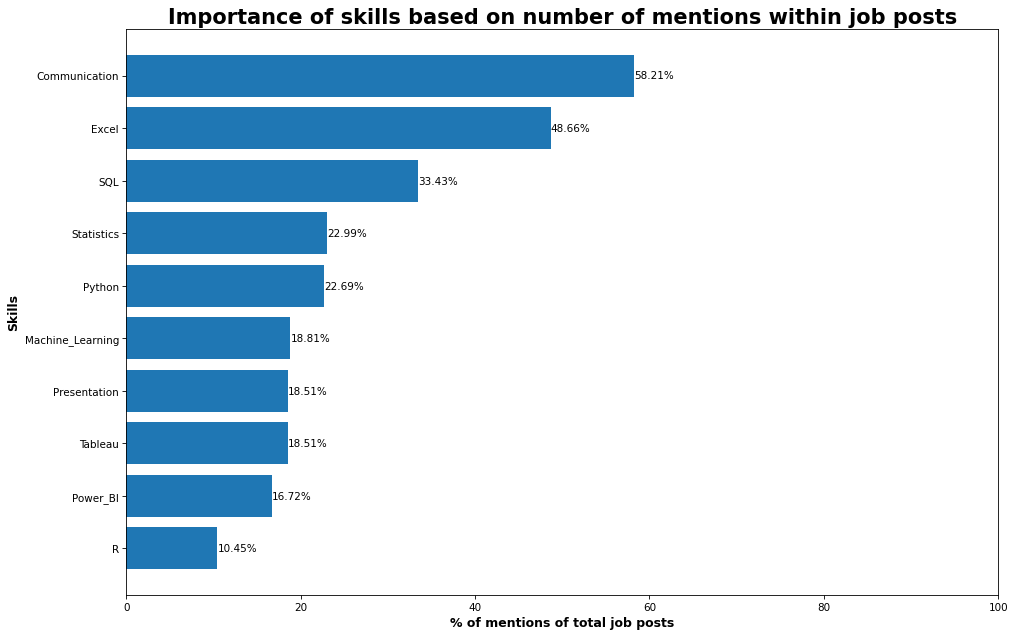

In [14]:
plt.figure(figsize = (15,10), dpi = 75)

bars = plt.barh(df1["Skills"], df1["%_of_Job_Posts"])
plt.bar_label(bars, labels=[f"{x}%" for x in bars.datavalues])
plt.xlim(0, 100)
plt.xlabel("% of mentions of total job posts", fontdict = {'fontweight': 'bold', 'fontsize': 12})
plt.ylabel("Skills", fontdict = {'fontweight': 'bold', 'fontsize': 12})
plt.title("Importance of skills based on number of mentions within job posts", fontdict = {'fontweight': 'bold', 'fontsize': 20})

plt.show()

We can see that even though technical skills such as excel, SQL, statistics and python take up the top few spot on important skills to have.<br>
Communication tops the chart with 58.21% mentions in all job posts.<br>
So being able to communicate the reports and the analysis done to stakeholders and team members is equally or may even be more important than having the skills to generate the analysis.

We can also see that within progamming skills, there is a large preference towards python as compared to R.<br>
However, between visualization tools Tableau and Power BI there is not much of a difference in preference.

After this analysis, if I am an aspiring Data Analyst, I would improve communication skills, excel, SQL and statistics.<br>
I would have a preference of python over R and be indifferent between  either Power B or Tableau to pick up.